In [3]:
import numpy as np
import pandas as pd

In [5]:
# Problem 1.1:
global_air_quality = pd.read_csv('global_air_quality.csv') # Pandas data frame
global_air_quality

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [14]:
# Problem 1.2:
global_air_quality['PM25_Value'] = global_air_quality['FactValueNumeric']
global_air_quality[['FactValueNumeric', 'PM25_Value']]

,FactValueNumeric,PM25_Value
0,10.01,10.01
1,10.02,10.02
2,10.06,10.06
3,10.08,10.08
4,10.09,10.09
...,...,...
9445,9.92,9.92
9446,9.92,9.92
9447,9.94,9.94
9448,9.95,9.95


In [64]:
# Problem 1.3:
continent = global_air_quality.groupby(['ParentLocation']).PM25_Value.mean() # The name of both columns must be supplied when using groupby() with mean()
avg = pd.DataFrame(continent)
avg.rename(columns={'PM25_Value' : 'Average_PM25'}, inplace = True)
df_merged = global_air_quality.merge(avg['Average_PM25'], on = 'ParentLocation', how = 'left')
df_merged.rename(columns={'Average_PM25_y' : 'Average_PM25'}, inplace = True)
df_merged[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']]

,Location,ParentLocation,PM25_Value,Average_PM25
0,Kenya,Africa,10.01,29.812282
1,Trinidad and Tobago,Americas,10.02,14.645728
2,United Kingdom of Great Britain and Northern I...,Europe,10.06,19.244727
3,Grenada,Americas,10.08,14.645728
4,Brazil,Americas,10.09,14.645728
...,...,...,...,...
9445,Belize,Americas,9.92,14.645728
9446,Trinidad and Tobago,Americas,9.92,14.645728
9447,Kenya,Africa,9.94,29.812282
9448,United States of America,Americas,9.95,14.645728


In [73]:
# Problem 1.4:
avg.Average_PM25.idxmax()
'''
I think it makes sense that the Eastern Mediterranean has the highest level of air pollution because most of the world's oil comes from this region so
there might be a lot of pollution coming from emissions.
'''

'Eastern Mediterranean'

In [77]:
# Problem 1.5:
updated_globalaq = df_merged[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']]
updated_globalaq.to_csv('updated_globalaq.csv', index=False)

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

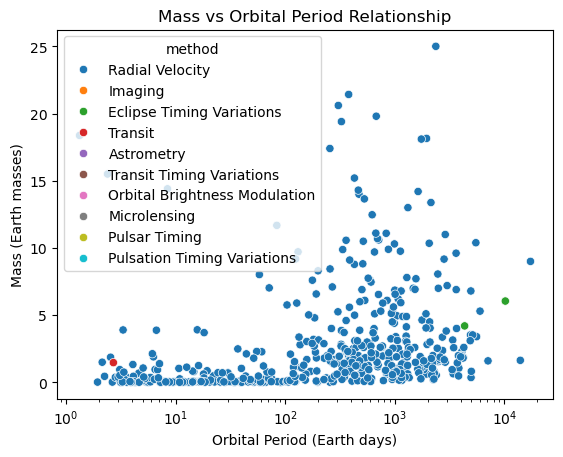

In [114]:
# Problem 2.1:
planets = sns.load_dataset("planets")
planet_sc = sns.scatterplot(planets, x= "orbital_period", y = "mass", hue = 'method')
planet_sc.set_title("Mass vs Orbital Period Relationship")
plt.xlabel("Orbital Period (Earth days)")
plt.ylabel("Mass (Earth masses)")
planet_sc.set_xscale('log')
plt.show()

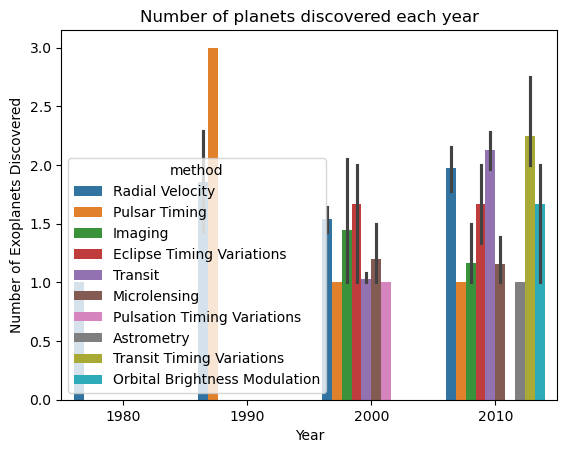

In [126]:
# Problem 2.2:
plt.figure()
planet_bp = sns.barplot(data = planets, x = "year", y = "number", hue = "method")
planet_bp.set_title("Number of planets discovered each year")
plt.xlabel("Year")
plt.ylabel("Number of Exoplanets Discovered")
plt.show()